In [1]:

from pyproj import Transformer


# Emprise de la couche CLC 2012
# en EPSG:32632 (UTM zone 32N, utilisé par le CLC 2012)
bbox_clc2012 = [
    747547.4962000000523403, # Ouest
    4721805.0087999999523163, # Nord
    901147.4962000000523403, # Est
    4875405.0087999999523163  # Sud
]

# Reprojection vers EPSG:3035(m) https://epsg.io/3035
transformer = Transformer.from_crs("EPSG:32632", "EPSG:3035", always_xy=True)
xmin_3035, ymin_3035 = transformer.transform(bbox_clc2012[0], bbox_clc2012[1])
xmax_3035, ymax_3035 = transformer.transform(bbox_clc2012[2], bbox_clc2012[3])
print(xmin_3035, ymin_3035, xmax_3035, ymax_3035)

# Ne pas excéder 2048x2048 pixels, le serveur WMS peut refuser les requêtes plus grandes
nrows = 2048
ncols = 2048



4487085.8727147225 2169232.9827681123 4642554.1253072955 2321106.596637802


Title:  CLC2012_WM
Type:  WMS
Operations:  ['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'GetStyles']
GetMap options:  ['image/bmp', 'image/jpeg', 'image/tiff', 'image/png', 'image/png8', 'image/png24', 'image/png32', 'image/gif', 'image/svg+xml']
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_GLP_R_WM Title: U2018_CLC2012_V2020_20u1_FR_GLP_R_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_GUF_R_WM Title: U2018_CLC2012_V2020_20u1_FR_GUF_R_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_MTQ_R_WM Title: U2018_CLC2012_V2020_20u1_FR_MTQ_R_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_MYT_R_WM Title: U2018_CLC2012_V2020_20u1_FR_MYT_R_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_REU_R_WM Title: U2018_CLC2012_V2020_20u1_FR_REU_R_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_GLP_WM Title: U2018_CLC2012_V2020_20u1_FR_GLP_WM
Nom de la couche : Layer Name: U2018_CLC2012_V2020_20u1_FR_GUF_WM Title: U2018_CLC

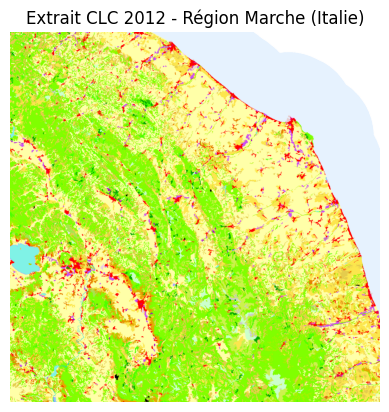

In [9]:
from owslib.wms import WebMapService
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Connexion au serveur WMS
wms_url = "https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2012_WM/MapServer/WMSServer?"
wms = WebMapService(wms_url, version="1.3.0")
print("Title: ", wms.identification.title)
print("Type: ", wms.identification.type)
print("Operations: ", [op.name for op in wms.operations])
print("GetMap options: ", wms.getOperationByName('GetMap').formatOptions)
wms.contents.keys()

# Récupérer le nom de la couche disponible
for layer_name in wms.contents.keys():
    print(f"Nom de la couche : {wms.contents[layer_name]}")
    
layer_name = "Corine_Land_Cover_2012_raster59601"
layer = wms.contents[layer_name]
print("Abstract: ", layer.abstract)
print("BBox: ", layer.boundingBoxWGS84)
print("CRS: ", layer.crsOptions)
print("Styles: ", layer.styles)
print("Timestamps: ", layer.timepositions)

style = layer.styles['default']
print("Style name: ", style['title'])
print(style.keys())
legend_url = style['legend']

   
img = wms.getmap(
    layers=[layer_name],
    styles=[''],
    srs='EPSG:3035',
    bbox=(xmin_3035, ymin_3035, xmax_3035, ymax_3035),
    size=(ncols, nrows),
    format='image/png', # pour avoir une image indexée avec une palette de couleurs
    transparent=True
)

print(type(img))

image = Image.open(BytesIO(img.read())).convert("P")  
print(image.size, image.mode)

# Afficher l’image
plt.imshow(image)
plt.title("Extrait CLC 2012 - Région Marche (Italie)")
plt.axis('off')
plt.show()

Legend URL: https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2012_WM/MapServer/WMSServer?request=GetLegendGraphic%26version=1.3.0%26format=image/png%26layer=Corine_Land_Cover_2012_raster59601
(534, 828) P


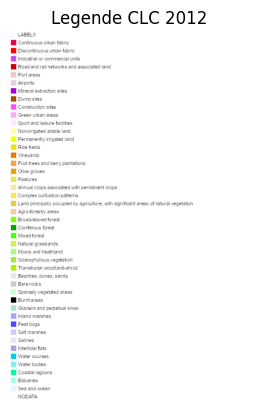

Nombre de couleurs : 216
Premières couleurs : [(0, 0, 0), (51, 0, 0), (102, 0, 0), (153, 0, 0), (204, 0, 0), (255, 0, 0), (0, 51, 0), (51, 51, 0), (102, 51, 0), (153, 51, 0), (204, 51, 0), (255, 51, 0), (0, 102, 0), (51, 102, 0), (102, 102, 0), (153, 102, 0), (204, 102, 0), (255, 102, 0), (0, 153, 0), (51, 153, 0), (102, 153, 0), (153, 153, 0), (204, 153, 0), (255, 153, 0), (0, 204, 0), (51, 204, 0), (102, 204, 0), (153, 204, 0), (204, 204, 0), (255, 204, 0), (0, 255, 0), (51, 255, 0), (102, 255, 0), (153, 255, 0), (204, 255, 0), (255, 255, 0), (0, 0, 51), (51, 0, 51), (102, 0, 51), (153, 0, 51), (204, 0, 51), (255, 0, 51), (0, 51, 51), (51, 51, 51), (102, 51, 51), (153, 51, 51), (204, 51, 51), (255, 51, 51), (0, 102, 51), (51, 102, 51), (102, 102, 51), (153, 102, 51), (204, 102, 51), (255, 102, 51), (0, 153, 51), (51, 153, 51), (102, 153, 51), (153, 153, 51), (204, 153, 51), (255, 153, 51), (0, 204, 51), (51, 204, 51), (102, 204, 51), (153, 204, 51), (204, 204, 51), (255, 204, 51), (0

LABEL3,RGB,COLOR
Continuous urban fabric,230-000-077,
Discontinuous urban fabric,255-000-000,
Industrial or commercial units,204-077-242,
Road and rail networks and associated land,204-000-000,
Port areas,230-204-204,
Airports,230-204-230,
Mineral extraction sites,166-000-204,
Dump sites,166-077-000,
Construction sites,255-077-255,
Green urban areas,255-166-255,


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from urllib.parse import urlencode
import urllib

from IPython.display import HTML
import pandas as pd


proxy = "http://irproxy:8082"  
proxy_handler = urllib.request.ProxyHandler({
    'http': proxy,
    'https': proxy
})
opener = urllib.request.build_opener(proxy_handler)

#legend_url = legend_url.replace("png", "png8")
print("Legend URL:", legend_url)
with opener.open(legend_url) as response:
    coverage_data = response.read()

    
legend = Image.open(BytesIO(coverage_data)).convert("P")
print(legend.size, legend.mode)
plt.imshow(legend)
plt.axis('off')
plt.title("Legende CLC 2012")
plt.show()


def get_palette(image):
    if image.mode == 'P':
        palette = image.getpalette()
        color_table = []
        for i in range(0, len(palette), 3):
            color = tuple(palette[i:i+3])
            if color not in color_table:
                color_table.append(color)
        filtered_colors = sorted(color_table, key=lambda x: (x[2], x[1], x[0]))
        #filtered_colors = [color for color in sorted(set(color_table))]  
        print("Nombre de couleurs :", len(filtered_colors))
        print("Premières couleurs :", filtered_colors)

        return filtered_colors

get_palette(legend)
color_table = get_palette(image)

# Lit les couleurs de la légende
labels_df = pd.read_csv("clc2000legend.csv", sep=";", encoding="utf-8")

# Création d'une nouvelle colonne avec la couleur RGB au format CSS
def parse_rgb_string(rgb_str):
    if pd.isna(rgb_str):
        r, g, b = 0, 0, 0
    else:
        r, g, b = map(int, rgb_str.split('-'))
    color =  f"rgb({r}, {g}, {b})"
    return f"<div style='width: 30px; height: 20px; background-color: {color}; border: 1px solid #ccc'></div>"

labels_df['COLOR'] = labels_df['RGB'].apply(parse_rgb_string)



# Afficher comme HTML
HTML(labels_df[['LABEL3', 'RGB', 'COLOR']].to_html(escape=False, index=False))


# # Lire avec rasterio
# with rasterio.open(BytesIO(coverage_data)) as src:
#     print("CRS :", src.crs)
#     print("Taille :", src.width, src.height)
#     print("Bbox :", src.bounds)
#     array = src.read(1)

#     # Affichage
#     plt.imshow(array)
#     plt.axis('off')
#     plt.title("Legende CLC 2012")
 #   plt.show()

CRS : EPSG:32632
Taille : 2048 2048
Bbox : BoundingBox(left=747547.4962, bottom=4721805.0088, right=901147.4962, top=4875405.0088)


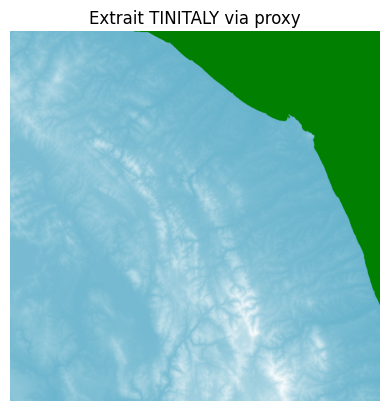

In [47]:
from owslib.wcs import WebCoverageService
from PIL import Image
from io import BytesIO
import urllib.request
from urllib.parse import urlencode
import rasterio
import matplotlib.pyplot as plt



proxy = "http://irproxy:8082"  
proxy_handler = urllib.request.ProxyHandler({
    'http': proxy,
    'https': proxy
})
opener = urllib.request.build_opener(proxy_handler)


# Connexion au service WCS  
wcs_url = "http://tinitaly.pi.ingv.it/TINItaly_1_1/wcs?"
# wcs = WebCoverageService(wcs_url, version="1.0.0")

# print(type(wcs))
# print("Title: ", wcs.identification.title)
# print("Type: ", wcs.identification.type)
# print("Operations: ", [op.name for op in wcs.operations])
# # Récupérer les couches disponibles
# for layer_name in wcs.contents.keys():
#     print(f"Nom de la couche : {layer_name}")
#     coverage = wcs.contents[layer_name]    
#     for format in coverage.supportedFormats:
#         print("Format supporté :", format)
#     # Affiche les CRS supportés
#     crs_list = coverage.supportedCRS
#     for crs in crs_list:
#         print("CRS:", crs)

layer_name = "TINItaly_1_1:tinitaly_dem"
params = {
    "service": "WCS",
    "request": "GetCoverage",
    "version": "1.0.0",
    "coverage": layer_name,
    "CRS": "EPSG:32632",
    "BBOX": ",".join(map(str, bbox_clc2012)),
    "format": "geotiff",
    "width": str(ncols),
    "height": str(nrows)
}
full_url = wcs_url + urlencode(params)

with opener.open(full_url) as response:
    coverage_data = response.read()
   

# Lire avec rasterio
with rasterio.open(BytesIO(coverage_data)) as src:
    print("CRS :", src.crs)
    print("Taille :", src.width, src.height)
    print("Bbox :", src.bounds)
    array = src.read(1)

    # Affichage
    plt.imshow(array, cmap='ocean')
    plt.axis('off')
    plt.title("Extrait TINITALY via proxy")
    plt.show()


